# Git processor demo

Here is a little demo that you can reuse for your own project.

In [145]:
import os

from git_processor.data import Projects


### Create the project and show the dataframe

In [146]:
p = Projects(os.path.abspath("stats.txt"))
p.df


,name,project A,project B,project C
0,hero,122.0,0.0,0.0
1,dog,100.0,12.0,0.0
2,owl,29.0,10.0,0.0
3,loco,6.0,0.0,0.0
4,monkey,6.0,0.0,0.0
5,coder,3.0,2.0,0.0
6,spy,1.0,0.0,0.0
7,owl2,0.0,5.0,0.0
8,badog,0.0,0.0,98.0
9,éspy,0.0,0.0,53.0


### Clean up the name, so that coder with multiple git aliases gets recognized as one

In [147]:
p.clean_up_names()
p.df


,name,project A,project B,project C
0,dog,100.0,12.0,98.0
1,hero,122.0,0.0,0.0
2,locom,6.0,0.0,26.0
3,monkey,6.0,0.0,0.0
4,owl,29.0,15.0,0.0
5,spy,1.0,0.0,53.0
6,thecoder,3.0,2.0,1.0


### Plot the amount of commit per user

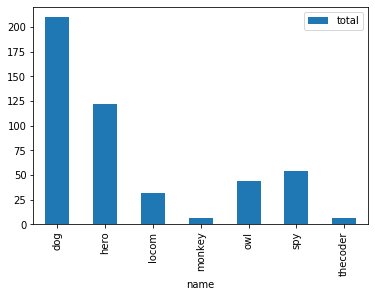

In [148]:
d = p.total().plot(kind='bar', x='name', y='total')


### Display only the amount of commit of the coder with animal aliases

In [165]:
from git_processor.parser import filter_user

filtered_df = filter_user(p.df, ['dog', 'monkey', 'owl'])

filtered_df = p.df.loc[p.df['name'].isin(['dog', 'monkey', 'owl'])]
filtered_df = filtered_df.set_index('name')

filtered_total = filtered_df.sum(axis=1, skipna=True).reset_index(name='total')


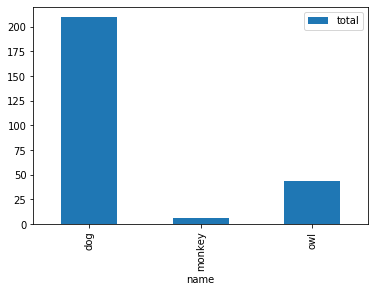

### Display percentage of total commit per user

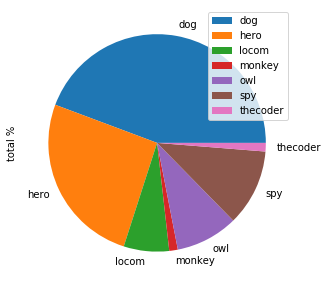

In [151]:
plot = p.user_percentage().plot.pie(y='total %', figsize=(5, 5))

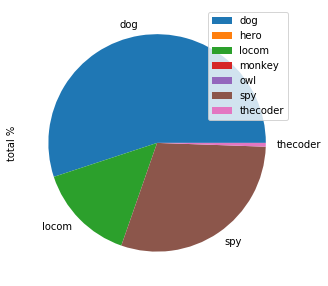

In [152]:
plot = p.user_percentage_project("project C").plot.pie(y='total %', figsize=(5, 5))

### Display average per user


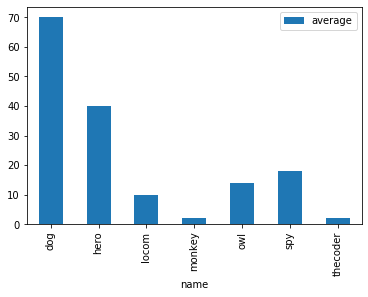

In [153]:
plot = p.user_average().reset_index().plot(kind='bar', x='name', y='average')

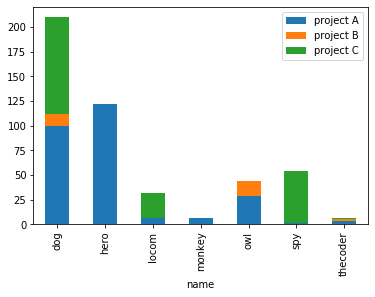

In [154]:
plot = p.df.set_index('name').plot(kind='bar',stacked=True)

### Data with projects

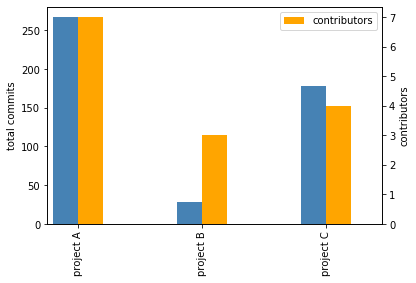

In [155]:
import matplotlib.pyplot as plt

df = p.projects_total().drop(['total'], axis=0).reset_index()

fig = plt.figure() 

ax = fig.add_subplot(111) 
ax2 = ax.twinx() 

width = 0.2

df.total.plot(kind='bar', color='steelblue', ax=ax, width=width, position=1)
p.contributor_per_project().plot(kind='bar', color='orange', ax=ax2, width=width, position=0)

ax.set_ylabel('total commits')
ax2.set_ylabel('contributors')

plt.show()

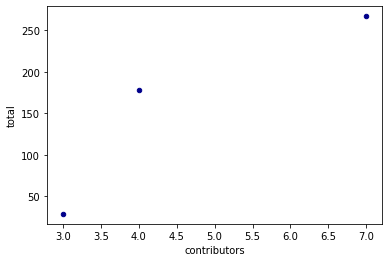

In [156]:
df = p.contributor_per_project()
df['total'] = p.projects_total()['total']
average['total %'] = p.projects_percentage()['total %']
scatter = df.plot.scatter(x='contributors', y='total', c='DarkBlue')

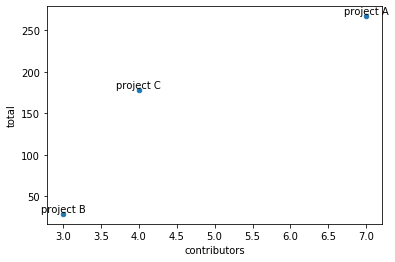

In [157]:
fig, ax = plt.subplots()
df.plot('contributors', 'total', kind='scatter', ax=ax)

for k, v in df.iterrows():
    ax.annotate(k, v, ha='center', va='bottom')

In [158]:
average = p.project_average()
average['total %'] = p.projects_percentage()['total %']
average

name,dog,hero,locom,monkey,owl,spy,thecoder,total,average,total %
project A,100.0,122.0,6.0,6.0,29.0,1.0,3.0,267.0,33,56.33
project B,12.0,0.0,0.0,0.0,15.0,0.0,2.0,29.0,3,6.12
project C,98.0,0.0,26.0,0.0,0.0,53.0,1.0,178.0,22,37.55
total,210.0,122.0,32.0,6.0,44.0,54.0,6.0,474.0,59,100.00


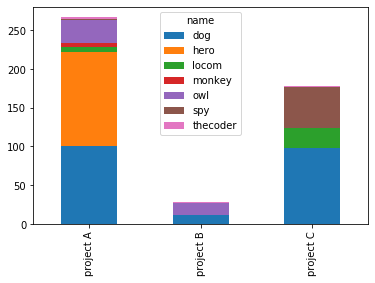

In [159]:
plot = p.df.set_index('name').transpose().plot(kind='bar',stacked=True)